In [1]:
import csv

    
import pandas as pd
df = pd.read_csv('data/iraq_geo.csv')

geo_loc = []
topic = "(\"" +  '" OR "'.join(df['title']) + "\") AND " 

df = df.drop('title', axis=1)
# df = df.dropna()

# print(df)
for column in df:
    geo_loc.append(df[column])
        
geo_loc = [item for sublist in geo_loc for item in sublist if item != 'Nan']    
geo_loc = list(set(filter(None, geo_loc)) )
geo_loc.pop(0)
print(len(geo_loc))

topic = topic +  "(\"" + '" OR "'.join(geo_loc) + "\")" 

print(topic) 

335
("civil war" OR "violence" OR "violent" OR "conflict" OR "fight*" OR "killing" OR "battle" OR "massacre" OR "injury" OR "butchery" OR "explosion" OR "car bombs" OR "car bombs" OR "corpse" OR "abduction" OR "ambush*" OR "suicide" OR "suicide bomber*" OR "rape" OR "persecution" OR "assassination" OR "terror*" OR "militia" OR "military base" OR "attack*" OR "assault" OR "gang" OR "crime" OR "theft" OR "clash*" OR "fighter*" OR "mortar" OR "rocket" OR "siege" OR "shelling" OR "shells" OR "force*" OR "bomb" OR "warring" OR "gun*" OR "soldiers" OR "rebel" OR "unrest" OR "troubled" OR "insurgent" OR "dead" OR "crisis" OR "victim" OR "detention" OR "detention" OR "detainee" OR "detainee" OR "prisoner" OR "prisoner" OR "detention centre" OR "detention centre" OR "indiscriminate" OR "checkpoint" OR "checkpoint" OR "operation" OR "detention centre" OR "torture" OR "elements" OR "execute" OR "execution" OR "withdrawal" OR "shelling" OR "feud" OR "weapons" OR "kidnapping" OR "body" OR "ransom" 

0     2012_01
1     2012_02
2     2012_03
3     2012_04
4     2012_05
5     2012_06
6     2012_07
7     2012_08
8     2012_09
9     2012_10
10    2012_11
11    2012_12
12    2013_01
13    2013_02
14    2013_03
15    2013_04
16    2013_05
17    2013_06
18    2013_07
19    2013_08
20    2013_09
21    2013_10
22    2013_11
23    2013_12
24    2014_01
25    2014_02
26    2014_03
27    2014_04
28    2014_05
29    2014_06
       ...   
37    2015_02
38    2015_03
39    2015_04
40    2015_05
41    2015_06
42    2015_07
43    2015_08
44    2015_09
45    2015_10
46    2015_11
47    2015_12
48    2016_01
49    2016_02
50    2016_03
51    2016_04
52    2016_05
53    2016_06
54    2016_07
55    2016_08
56    2016_09
57    2016_10
58    2016_11
59    2016_12
60    2017_01
61    2017_02
62    2017_03
63    2017_04
64    2017_05
65    2017_06
66    2017_07
Name: window, dtype: object


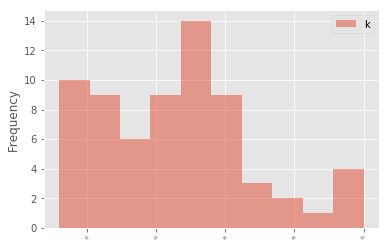

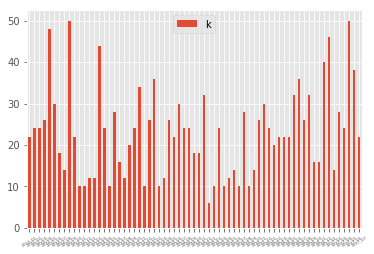

In [24]:
# Create histogram and bar charts from the window topic coherence.

import csv
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
%matplotlib inline
import pandas as pd
df = pd.read_csv('/home/sonic/sonic/eosdb/dynamic_nmf/data/windowbin/csv/window_topic_results_df.csv')

print(df['window'])
plt.figure()
ax = df.plot.hist(alpha=0.5)
fig = ax.get_figure()
plt.xticks(rotation=30, fontsize=4)
plt.show()
fig.savefig('data/eos/graphs/nmf_top_k_coherence_hist.png', dpi=800)

ax = df.plot.bar()
ax.set_xticklabels(df['window'])
fig = ax.get_figure()
plt.xticks(rotation=30, fontsize=4)
plt.show()
fig.savefig('data/eos/graphs/nmf_top_k_coherence_bar.png', dpi=800)

# EOS preprocess library

In [1]:
import os
import codecs
import string
import xmltodict
import glob
import spacy
import pandas as pd
import itertools as it

from gensim.corpora import Dictionary, MmCorpus
from gensim.models.ldamulticore import LdaMulticore

import pyLDAvis
import pyLDAvis.gensim
import warnings
import _pickle as pickle

from gensim.models import Phrases
from gensim.models.word2vec import LineSentence

nlp = spacy.load('en')

In [2]:
# path = "data/Karbala/en_2014-01-12_41da726433d291c1eefd349dab376dd96f7bdb3.xml"
# path = "data/Karbala/*.xml"
path = "/home/sonic/sonic/EOS_DATA/XML_Export_6-8-2015/ContainingTerms/English/*/*.xml"
review_txt_filepath = 'data/eos/review_text_all.txt'
unigram_sentences_filepath = 'data/eos/unigram_sentences_all.txt'
bigram_model_filepath = 'data/eos/bigram_model_all'
bigram_sentences_filepath = 'data/eos/bigram_sentences_all.txt'
trigram_model_filepath = 'data/eos/trigram_model_all'
trigram_sentences_filepath = 'data/eos/trigram_sentences_all.txt'
trigram_reviews_filepath = 'data/eos/trigram_transformed_reviews_all.txt'
trigram_dictionary_filepath = 'data/eos/trigram_dict_all.dict'
trigram_bow_filepath = 'data/eos/trigram_bow_corpus_all.mm'
lda_model_filepath = 'data/eos/lda_model_all'

In [ ]:
%%time

# this is a bit time consuming - make the if statement True
# if you want to execute data prep yourself.
if 1 == 1:
    
    review_count = 0

    # create & open a new file in write mode
    with codecs.open(review_txt_filepath, 'w', encoding='utf_8') as review_txt_file:

        for fname in glob.glob(path):
            
            with codecs.open(fname, encoding='utf_8') as doc_file:
                # print(fname)
                try:
                    doc = xmltodict.parse(doc_file.read())
                    # print(doc['Document']['Id'])
                    # print(doc['Document']['Text'])
                    # tokens = word_tokenize(doc['Document']['Text'].lower())
                    review_txt_file.write(doc['Document']['Text'].replace('\n', ' ').lower())
                    review_count += 1
                except Exception as e: 
                    print(e)

                    
        print (u'''Text from {:,} documents written to the new txt file.'''.format(review_count))
    
else:
    
    with codecs.open(review_txt_filepath, encoding='utf_8') as review_txt_file:
        for review_count, line in enumerate(review_txt_file):
            pass
        
    print (u'Text from {:,} documents in the txt file.'.format(review_count + 1))

In [ ]:
%%time

with codecs.open(review_txt_filepath, encoding='utf_8') as f:
    sample_doc = list(it.islice(f, 0, 1))[0]
    sample_doc = sample_review.replace('\\n', '\n')
    
parsed_review = nlp(sample_doc)
print (parsed_review)

In [ ]:
for num, sentence in enumerate(parsed_review.sents):
    print ('Sentence {}:'.format(num + 1))
    print (sentence)
    print ('')

In [ ]:
for num, entity in enumerate(parsed_review.ents):
    print ('Entity {}:'.format(num + 1), entity, '-', entity.label_)
    print ('')

In [ ]:
# token_text = [token.orth_ for token in parsed_review]
# token_pos = [token.pos_ for token in parsed_review]

# pd.DataFrame(list(zip(token_text, token_pos)), columns=['token_text', 'part_of_speech'])

In [ ]:
token_lemma = [token.lemma_ for token in parsed_review]
token_shape = [token.shape_ for token in parsed_review]

pd.DataFrame(list(zip(token_text, token_lemma, token_shape)),
             columns=['token_text', 'token_lemma', 'token_shape'])

In [3]:
def punct_space(token):
    """
    helper function to eliminate tokens
    that are pure punctuation or whitespace
    """
    
    return token.is_punct or token.is_space

def line_review(filename):
    """
    generator function to read in reviews from the file
    and un-escape the original line breaks in the text
    """
    
    with codecs.open(filename, encoding='utf_8') as f:
        for review in f:
            # yield review.replace('\\n', '\n')
            yield review
            
def lemmatized_sentence_corpus(filename):
    """
    generator function to use spaCy to parse reviews,
    lemmatize the text, and yield sentences
    """
    
    for parsed_review in nlp.pipe(line_review(filename),
                                  batch_size=100, n_threads=7):
        
        for sent in parsed_review.sents:
            yield u' '.join([token.lemma_ for token in sent
                             if not punct_space(token)])

In [5]:
%%time

# this is a bit time consuming - make the if statement True
# if you want to execute data prep yourself.
if 1 == 1:

    with codecs.open(unigram_sentences_filepath, 'w', encoding='utf_8') as f:
        for sentence in lemmatized_sentence_corpus(review_txt_filepath):
            f.write(sentence + '\n')

CPU times: user 3h 30min 21s, sys: 32 s, total: 3h 30min 53s
Wall time: 1h 21min 50s


In [6]:
unigram_sentences = LineSentence(unigram_sentences_filepath)

In [4]:
%%time

# Bigrams
# this is a bit time consuming - make the if statement True
# if you want to execute modeling yourself.
if 0 == 1:

    bigram_model = Phrases(unigram_sentences)

    bigram_model.save(bigram_model_filepath)
    
# load the finished model from disk
bigram_model = Phrases.load(bigram_model_filepath)

CPU times: user 8.64 s, sys: 588 ms, total: 9.22 s
Wall time: 9.23 s


In [8]:
%%time

# this is a bit time consuming - make the if statement True
# if you want to execute data prep yourself.
if 1 == 1:

    with codecs.open(bigram_sentences_filepath, 'w', encoding='utf_8') as f:
        
        for unigram_sentence in unigram_sentences:
            
            bigram_sentence = u' '.join(bigram_model[unigram_sentence])
            
            f.write(bigram_sentence + '\n')

/usr/local/lib/python3.5/dist-packages/gensim/models/phrases.py:274: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


CPU times: user 11min 52s, sys: 2.94 s, total: 11min 55s
Wall time: 11min 54s


In [7]:
bigram_sentences = LineSentence(bigram_sentences_filepath)

In [5]:
%%time

# this is a bit time consuming - make the if statement True
# if you want to execute modeling yourself.
if 0 == 1:

    trigram_model = Phrases(bigram_sentences)

    trigram_model.save(trigram_model_filepath)
    
# load the finished model from disk
trigram_model = Phrases.load(trigram_model_filepath)

CPU times: user 9.81 s, sys: 392 ms, total: 10.2 s
Wall time: 10.2 s


In [11]:
%%time

# this is a bit time consuming - make the if statement True
# if you want to execute data prep yourself.
if 0 == 1:

    with codecs.open(trigram_sentences_filepath, 'w', encoding='utf_8') as f:
        
        for bigram_sentence in bigram_sentences:
            
            trigram_sentence = u' '.join(trigram_model[bigram_sentence])
            
            f.write(trigram_sentence + '\n')

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 4.77 µs


In [8]:
trigram_sentences = LineSentence(trigram_sentences_filepath)

In [ ]:
%%time

# Main Funtion

if 1 == 1:

    with codecs.open(trigram_reviews_filepath, 'w', encoding='utf_8') as f:
        
        for parsed_review in nlp.pipe(line_review(review_txt_filepath),
                                      batch_size=100, n_threads=7):
            
            # lemmatize the text, removing punctuation and whitespace
            unigram_review = [token.lemma_ for token in parsed_review
                              if not punct_space(token)]
                        
            # apply the first-order and second-order phrase models
            bigram_review = bigram_model[unigram_review]
            trigram_review = trigram_model[bigram_review]
            
            # remove any remaining stopwords
            trigram_review = [term for term in trigram_review
                              if term not in spacy.en.language_data.STOP_WORDS]
            
            # write the transformed review as a line in the new file
            trigram_review = u' '.join(trigram_review)
            f.write(trigram_review + '\n')

/usr/local/lib/python3.5/dist-packages/gensim/models/phrases.py:274: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [19]:
%%time

# tCreat trigram dictionary

if 1 == 1:

    trigram_reviews = LineSentence(trigram_reviews_filepath)


    # learn the dictionary by iterating over all of the reviews
    trigram_dictionary = Dictionary(trigram_reviews)
    
    # filter tokens that are very rare or too common from
    # the dictionary (filter_extremes) and reassign integer ids (compactify)
    trigram_dictionary.filter_extremes(no_below=10, no_above=0.4)
    trigram_dictionary.compactify()

    trigram_dictionary.save(trigram_dictionary_filepath)
    
# load the finished dictionary from disk
trigram_dictionary = Dictionary.load(trigram_dictionary_filepath)

TypeError: 'LineSentence' object does not support indexing

In [7]:
def trigram_bow_generator(filepath):
    """
    generator function to read reviews from a file
    and yield a bag-of-words representation
    """
    
    for review in LineSentence(filepath):
        yield trigram_dictionary.doc2bow(review)

In [8]:
%%time

if 1 == 1:

    # generate bag-of-words representations for
    # all reviews and save them as a matrix
    MmCorpus.serialize(trigram_bow_filepath,
                       trigram_bow_generator(trigram_reviews_filepath))
    
# load the finished bag-of-words corpus from disk
trigram_bow_corpus = MmCorpus(trigram_bow_filepath)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 2.43 ms
